In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [2]:
DATA_DIR = Path("./dataset_parts")
PARQUET_FILES = sorted(list(DATA_DIR.glob("*.parquet")))
print(f"Found {len(PARQUET_FILES)} parquet files.")

Found 500 parquet files.


In [3]:
df = pd.concat([pd.read_parquet(f) for f in PARQUET_FILES], ignore_index=True)
df.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,5.347727e-01,5.463238e-01,6.699412e-01,4.546046e+01,6.464149e+01,2.886610e+00
std,3.967521e-01,3.135891e-01,6.458270e-01,1.850226e+03,2.579810e+03,1.911407e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+04,-1.000000e+04,0.000000e+00
25%,0.000000e+00,2.500000e-01,0.000000e+00,-2.050000e+02,-2.270000e+02,1.000000e+00
50%,5.000000e-01,5.000000e-01,1.000000e+00,8.000000e+00,4.000000e+00,3.000000e+00
75%,1.000000e+00,8.333333e-01,1.000000e+00,2.830000e+02,3.220000e+02,4.000000e+00
max,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+04,1.000000e+04,6.000000e+00


In [4]:
df.head()

,fen,game_result,game_phase,game_stage,is_check,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,1.0,1.0,0,False,52.0,42.0,3
1,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,1.0,1.0,0,False,45.0,40.0,3
2,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,1.0,1.0,0,False,34.0,33.0,3
3,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,1.0,1.0,0,False,37.0,31.0,3
4,r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/R...,1.0,1.0,0,False,25.0,24.0,3


In [5]:
print("Statistics for Stockfish Depth 20 Scores:")
df["stockfish_score_depth_20"].describe()

Statistics for Stockfish Depth 20 Scores:


count    5.000000e+06
mean     6.464149e+01
std      2.579810e+03
min     -1.000000e+04
25%     -2.270000e+02
50%      4.000000e+00
75%      3.220000e+02
max      1.000000e+04
Name: stockfish_score_depth_20, dtype: float64

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fen                         0
game_result                 0
game_phase                  0
game_stage                  0
is_check                    0
stockfish_score_depth_10    0
stockfish_score_depth_20    0
stockfish_label_depth_20    0
dtype: int64


In [7]:
df_no_mate = df[df["stockfish_score_depth_20"].between(-5000,5000)]
df_no_mate.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,4.673807e+06,4.673807e+06,4.673807e+06,4.673807e+06,4.673807e+06,4.673807e+06
mean,5.347768e-01,5.598882e-01,6.430047e-01,2.265770e+01,2.479840e+01,2.892024e+00
std,3.937160e-01,3.143134e-01,6.428313e-01,3.618391e+02,4.231788e+02,1.811748e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.995000e+03,-5.000000e+03,0.000000e+00
25%,0.000000e+00,2.500000e-01,0.000000e+00,-1.710000e+02,-1.830000e+02,2.000000e+00
50%,5.000000e-01,5.833333e-01,1.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00
75%,1.000000e+00,8.333333e-01,1.000000e+00,2.450000e+02,2.730000e+02,4.000000e+00
max,1.000000e+00,1.000000e+00,2.000000e+00,9.990000e+03,4.998000e+03,6.000000e+00


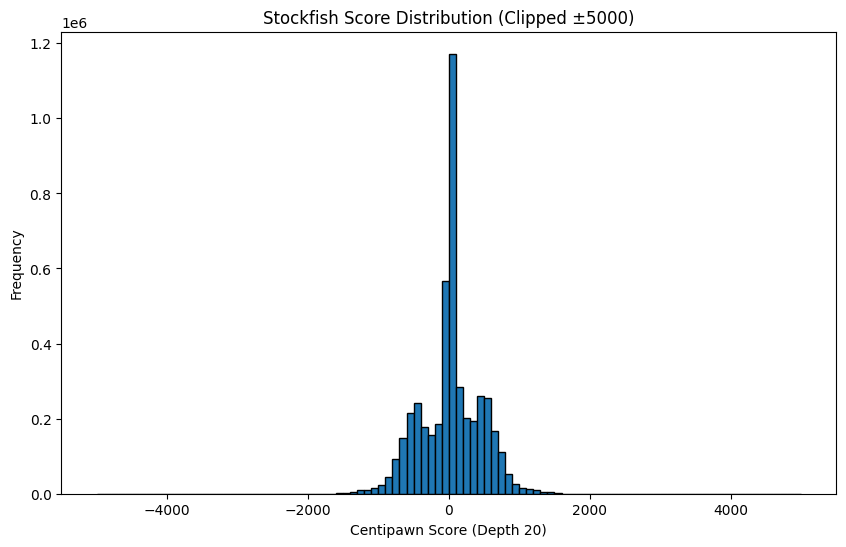

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_mate["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Clipped ±5000)")
plt.show()

In [9]:
lower_bound = df["stockfish_score_depth_20"].quantile(0.01)
upper_bound = df["stockfish_score_depth_20"].quantile(0.99)
print(f"Filtering data between {lower_bound:.1f} and {upper_bound:.1f} cp")
df_center = df[df["stockfish_score_depth_20"].between(lower_bound, upper_bound)]
df_center.describe()


Filtering data between -9997.0 and 9997.0 cp


,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,4.909867e+06,4.909867e+06,4.909867e+06,4.909867e+06,4.909867e+06,4.909867e+06
mean,5.346494e-01,5.482343e-01,6.665321e-01,3.417133e+01,5.359943e+01,2.888197e+00
std,3.959341e-01,3.146524e-01,6.475987e-01,1.293070e+03,2.223452e+03,1.885715e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.998000e+03,-9.997000e+03,0.000000e+00
25%,0.000000e+00,2.500000e-01,0.000000e+00,-1.960000e+02,-2.150000e+02,1.000000e+00
50%,5.000000e-01,5.000000e-01,1.000000e+00,8.000000e+00,4.000000e+00,3.000000e+00
75%,1.000000e+00,8.333333e-01,1.000000e+00,2.720000e+02,3.090000e+02,4.000000e+00
max,1.000000e+00,1.000000e+00,2.000000e+00,9.997000e+03,9.997000e+03,6.000000e+00


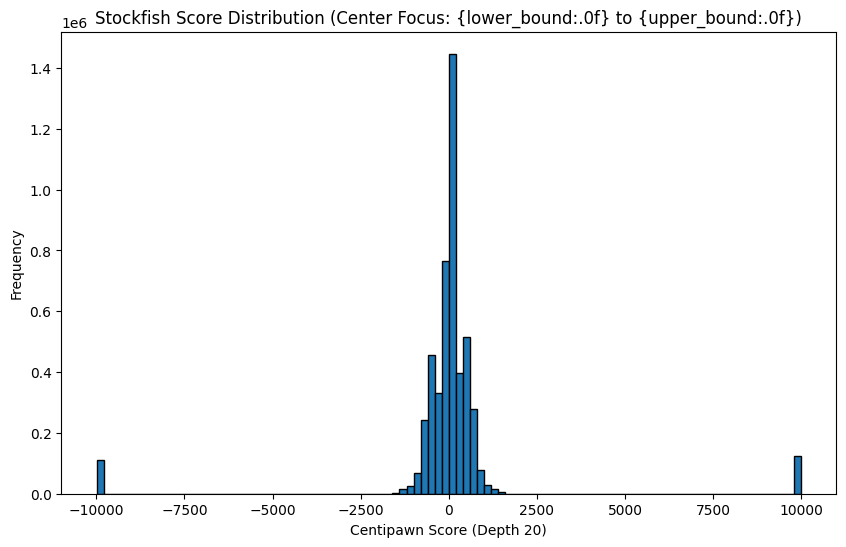

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_center["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Center Focus: {lower_bound:.0f} to {upper_bound:.0f})")
plt.show()

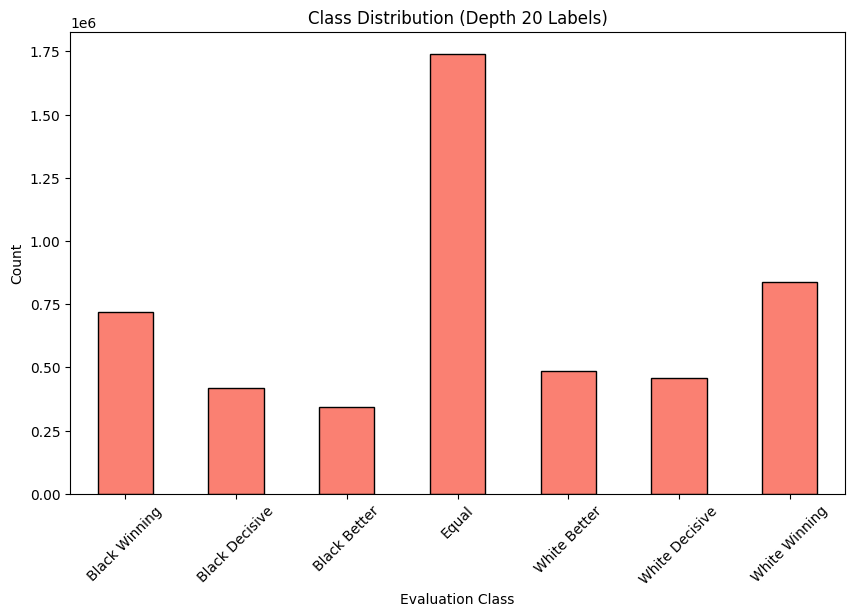

In [11]:
label_map = {
    0: "White Winning",
    1: "White Decisive",
    2: "White Better",
    3: "Equal",
    4: "Black Better",
    5: "Black Decisive",
    6: "Black Winning"
}

counts = df["stockfish_label_depth_20"].value_counts().sort_index()
counts = counts.iloc[::-1]
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color='salmon', edgecolor='black')
plt.xticks(ticks=range(len(counts)), 
           labels=[label_map.get(i, i) for i in counts.index], 
           rotation=45)

plt.xlabel("Evaluation Class")
plt.ylabel("Count")
plt.title("Class Distribution (Depth 20 Labels)")
plt.show()


In [12]:
exact_counts = counts.rename(index=label_map)
print(exact_counts)

stockfish_label_depth_20
Black Winning      719759
Black Decisive     418407
Black Better       343680
Equal             1740142
White Better       485495
White Decisive     456323
White Winning      836194
Name: count, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

file_path = Path("./dataset_processed_clean_split/chess_bitboard_train.npz")

with np.load(file_path) as data:
    X_train = data['X']

pieces_per_position = np.sum(X_train, axis=1)

print(f"Min pieces on board: {pieces_per_position.min()}")
print(f"Max pieces on board: {pieces_per_position.max()}")
print(f"Avg pieces on board: {pieces_per_position.mean():.2f}")

plt.figure(figsize=(10, 5))
plt.hist(pieces_per_position, bins=range(0, 34), color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Active Pieces (Bitboard Population)")
plt.xlabel("Number of Pieces on Board")
plt.ylabel("Count")
plt.axvline(32, color='red', linestyle='--', label='Max Pieces (32)')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_processed_clean_split\\chess_bitboard_train.npz'

In [15]:
files = [
    Path("./dataset_processed_clean_split/chess_bitboard_train.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_val.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_test.npz")
]

total_even = 0
total_odd = 0
total_positions = 0

print(f"{'Dataset':<10} | {'Total':<10} | {'Even':<10} | {'Odd':<10} | {'Even %':<8} | {'Odd %':<8}")
print("-" * 75)

for file_path in files:
    try:
        split_name = file_path.stem.split('_')[-1].capitalize()  # e.g., "Train", "Val"
        
        with np.load(file_path) as data:
            # Load data (assuming key is 'X' based on your previous code)
            X = data['X']
            
            # Calculate pieces per position
            pieces_per_position = np.sum(X, axis=1)
            
            # Count
            count_even = np.sum(pieces_per_position % 2 == 0)
            count_odd = np.sum(pieces_per_position % 2 != 0)
            total = len(pieces_per_position)
            
            # Add to grand totals
            total_even += count_even
            total_odd += count_odd
            total_positions += total
            
            # Print row for this file
            print(f"{split_name:<10} | {total:<10,} | {count_even:<10,} | {count_odd:<10,} | {count_even/total:.1%}   | {count_odd/total:.1%}")

    except FileNotFoundError:
        print(f"Error: Could not find {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("-" * 75)
# Print Grand Total
print(f"{'ALL':<10} | {total_positions:<10,} | {total_even:<10,} | {total_odd:<10,} | {total_even/total_positions:.1%}   | {total_odd/total_positions:.1%}")

Dataset    | Total      | Even       | Odd        | Even %   | Odd %   
---------------------------------------------------------------------------
Train      | 800,000    | 529,994    | 270,006    | 66.2%   | 33.8%
Val        | 100,000    | 66,354     | 33,646     | 66.4%   | 33.6%
Test       | 100,000    | 65,803     | 34,197     | 65.8%   | 34.2%
---------------------------------------------------------------------------
ALL        | 1,000,000  | 662,151    | 337,849    | 66.2%   | 33.8%
